# Visual Question Answering App
* Made with love by `Pejman`

### 1. Salesforceblip_vqa_base Model (Simple model)

In [8]:
!pip install transformers Pillow requests

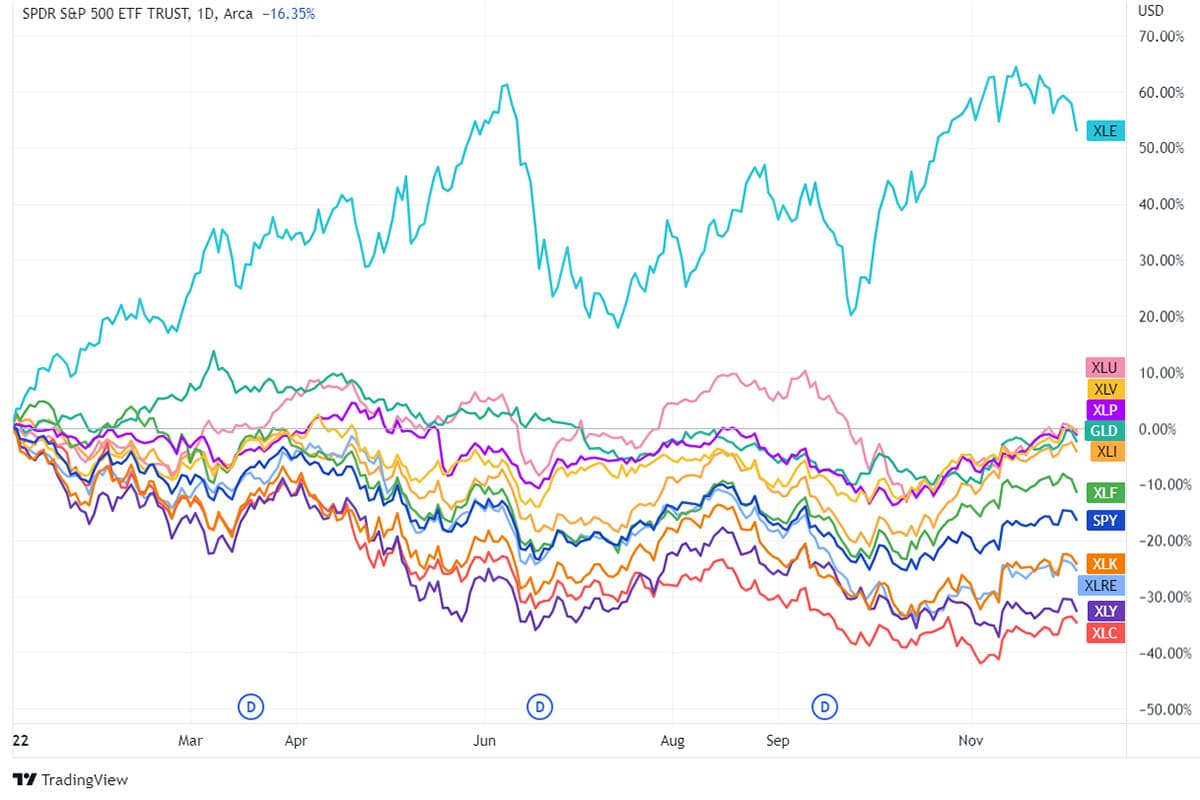

In [10]:
from PIL import Image
import requests
from io import BytesIO

img_url = 'https://theedgemalaysia.com/_next/image?url=https%3A%2F%2Fassets.theedgemarkets.com%2FBeyond-Insights_AdvDec_thumb_12Dec2022.jpg&w=1920&q=75'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
img

In [14]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base").to("cuda")

img_url = 'https://theedgemalaysia.com/_next/image?url=https%3A%2F%2Fassets.theedgemarkets.com%2FBeyond-Insights_AdvDec_thumb_12Dec2022.jpg&w=1920&q=75'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

question = "Describe the image in detail with all informations in 100 words"
inputs = processor(raw_image, question, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

multi colored line


### 2. MiniCPM-Llama3-V-2_5 Model (Trend model)

In [1]:
!pip install Pillow==10.1.0 torch==2.1.2 torchvision==0.16.2 transformers==4.40.0 sentencepiece==0.1.99

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 108.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 96.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.w

In [1]:
import transformers
print(f"transformers versio: {transformers.__version__}")

transformers versio: 4.40.0


In [3]:
# test.py
import torch
from PIL import Image
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained('openbmb/MiniCPM-Llama3-V-2_5', trust_remote_code=True, torch_dtype=torch.float16)
model = model.to(device='cuda')

tokenizer = AutoTokenizer.from_pretrained('openbmb/MiniCPM-Llama3-V-2_5', trust_remote_code=True)
model.eval()

image = Image.open('/content/finC.png').convert('RGB')
question = 'Describe the image in detail?'
msgs = [{'role': 'user', 'content': question}]

res = model.chat(
    image=image,
    msgs=msgs,
    tokenizer=tokenizer,
    sampling=True, # if sampling=False, beam_search will be used by default
    temperature=0.7,
    # system_prompt='' # pass system_prompt if needed
)
print(res)

## if you want to use streaming, please make sure sampling=True and stream=True
## the model.chat will return a generator
res = model.chat(
    image=image,
    msgs=msgs,
    tokenizer=tokenizer,
    sampling=True,
    temperature=0.7,
    stream=True
)

generated_text = ""
for new_text in res:
    generated_text += new_text
    print(new_text, flush=True, end='')


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


The image is a line graph titled "St. Thomas Aquinas Parish Annual Pledged ($) versus Actual Receipts ($)". It displays the financial performance of St. Thomas Aquinas Parish over several fiscal years, from 2010 to 2016. The graph has two lines: one representing the total pledged amount (all parishioners) and the other representing the received actual amount. The pledged amount fluctuates between approximately $700,000 and $1,000,000. The received actual amount shows a similar trend but starts slightly lower in 2010 at around $850,000 and ends in 2016 at about $950,000. The background is white with black text for the title and axis labels, and the lines are colored in blue and red to distinguish between the pledged and received amounts.
The image is a line graph titled "St. Thomas Aquinas Parish Annual Pledged ($) versus Actual Receipts ($)". The x-axis represents the fiscal year from 2010 to 2016, and the y-axis shows the annual amount in dollars, ranging from $650,000 to $1,000,000. 

### 3. Make a Gradio App and make it live!

In [5]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 111.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 13.2 MB

In [8]:
import gradio as gr
import torch
from PIL import Image
from transformers import AutoModel, AutoTokenizer

# Load the model and tokenizer
model = AutoModel.from_pretrained('openbmb/MiniCPM-Llama3-V-2_5', trust_remote_code=True, torch_dtype=torch.float16)
model = model.to(device='cuda')
tokenizer = AutoTokenizer.from_pretrained('openbmb/MiniCPM-Llama3-V-2_5', trust_remote_code=True)
model.eval()

# Define a function to generate a response
def generate_response(image, question):
    msgs = [{'role': 'user', 'content': question}]
    res = model.chat(
        image=image,
        msgs=msgs,
        tokenizer=tokenizer,
        sampling=True,
        temperature=0.7,
        stream=True
    )
    generated_text = ""
    for new_text in res:
        generated_text += new_text
    return generated_text


# Create a Gradio interface
iface = gr.Interface(
    fn=generate_response,
    inputs=[gr.Image(type="pil"), "text"],
    outputs="text",
    title="Visual Question Answering",
    description="Input an image and a question related to the image to receive a response.",
)

# Launch the app
iface.launch(debug=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://78109f80dcb06a318a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://78109f80dcb06a318a.gradio.live
